# **SAUDI USED CARS** 

pingin tahu aja ada perubahan atau tidak

# **CONTENTS**
1. Business Problem Understanding
2. Data understanding 
3. Data Preprocessing
4. Modeling
5. Conclusion

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Traintest test split
from sklearn.model_selection import train_test_split, cross_val_score

# preprocessing
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
# evaluation metrics

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# scoriinng
from sklearn.metrics import accuracy_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# **Business Problem Understanding**
## Context
Saudi Used Cars dataset contains 5624 records of used cars collected from syarah.com. Each row represents a used car. Other information regarding each car is the brand name, model, manufacturing year, origin, options, engine capacity, transmission type, mileage that the car covered, region price, and negotiable.

`Syarah.com` is an online marketplace for buying and selling used cars in Saudi Arabia, with a large and diverse inventory of used cars from different regions, brands, models, and years. For both buyers and sellers on the platform, the key factor that determines the success of a transaction is the price of the used car. 
- Buyers want to pay a fair and reasonable price. 
- sellers want to maximize their profit by setting the right price.

## **Problem Statement**
The problem statement for this context is to build a machine learning model that predicts the price of a used car on Syarah.com, and use this model to help sellers set the **optimal price** for their listings and increase their profit, while also helping buyers make informed decisions about the value of the cars they want to purchase.

## Goals
Setting the right price for a used car can be a challenging task, as it depends on a wide range of factors such as the condition of the car, the mileage, the brand, the year, the region, the options, and the demand and supply in the market. 

This is where machine learning can help. By analyzing the historical data of used car sales on Syarah.com 

I want to build a machine learning model that predicts the price of a used car based on its features, and use this model to set the optimal price for a new used car listing. 

# **Data Understanding**

**Attributes Information**

 **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Type | Object  | Type of a Car |
| Region | Object | The region in which the used car was offered for sale |
| Make | Object | The company name |
| Gear_Type | Object | Gear type size of used car |
| Origin | Object | Origin of used car |
| Options | Object | Options or an accesories installed by the previous owner |
| Year | Integer | Manufacturing year |
| Engine_Size | Float | The engine size of used car |
| Mileage | Integer | Mileage of used car |
| Negotiable | Boolean | True if the price is 0, that means it is negotiable |
| Price | Integer | Used car price in SAR |

<br>


In [3]:
# Load dataset
saudi = pd.read_csv('data_saudi_used_cars.csv')
saudi.head(1)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0


## **Exploratory Data Analysis**
Exploratory Data Analysis (EDA) is a process of analyzing and summarizing the main characteristics of a dataset to gain insights and understanding of the data. The goal of EDA is to explore the data in order to identify patterns, trends, and anomalies, and to generate hypotheses that can be further tested using statistical and machine learning techniques.


Visualizing the distribution of the target variable (price) and the input features (e.g., engine size, mileage, year, brand, etc.) to identify any trends or patterns in the data.
Analyzing the correlation between the input features and the target variable to identify the most influential features that affect the price of a used car.
Identifying and handling missing values, outliers, and other data quality issues that can affect the accuracy of the machine learning model.
Analyzing the distribution of categorical variables, such as the make, gear type, and origin, to identify any trends or biases in the data.
By performing EDA on the Saudi Arabia Used Cars dataset, we can gain insights such as:

The most popular car brands and models in the used car market in Saudi Arabia.
The most influential factors that affect the price of a used car, such as the engine size, mileage, and year.
The distribution of the target variable (price) and the presence of any outliers or extreme values that need to be handled.
The distribution of categorical variables and their impact on the target variable.
These insights can help in selecting the most relevant features for the machine learning model, and in identifying any data quality issues that need to be addressed before training the model.

## Distribution plot of cars' price

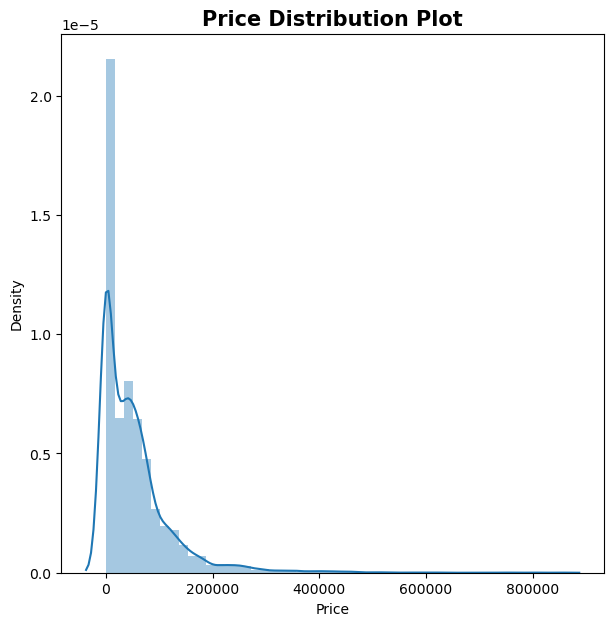

In [4]:
# Distribution plot of 'price'
plt.figure(figsize=(7, 7))
sns.distplot(saudi['Price'])
plt.title('Price Distribution Plot', size=15, weight='bold');

According to the distribution plot of used cars price above. We can see the plot is 'right-skewed distribution', the skewness is positive for price variable.

We can see also there is an extreme value of zero for price. 

Because we have found the 0 value, I will treat the 0 value after this

In [5]:
saudi = saudi[saudi['Price']>0]

we have treated the extreme value and we will see the Unique Values from all columns

In [6]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in saudi.columns :
    listItem.append( [col, saudi[col].nunique(), saudi[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Type,320,"[Yukon, Range Rover, Optima, CX3, Cayenne S, Sonata, Avalon, C300, Land Cruiser, LS, FJ, Tucson, Sunny, Pajero, Azera, Focus, 5, Spark, Pathfinder, Accent, ML, Corolla, Tahoe, A, Altima, Expedition, Senta fe, Liberty, X, Elantra, Land Cruiser Pickup, VTC, Malibu, The 5, Patrol, Grand Cherokee, Camry, SL, Previa, SEL, MKZ, Datsun, Hilux, GLC, Edge, 6, Innova, Navara, G80, Carnival, Suburban, Camaro, Accord, Taurus, Optra, Flex, S, Cerato, Furniture, Murano, Land Cruiser 70, 3, Pick up, Charger, H6, Hiace, Fusion, Aveo, CX9, Yaris, Sierra, Durango, CT-S, Sylvian Bus, ES, Navigator, Opirus, The 7, Creta, CS35, The 3, GLE, Sedona, Victoria, Prestige, CLA, Vanquish, Safrane, Cores, Cadenza, D'max, Silverado, Rio, Maxima, X-Trail, Cruze, C, Seven, Prado, Caprice, ...]"
1,Region,27,"[Riyadh, Hafar Al-Batin, Abha, Makkah, Dammam, Jeddah, Khobar, Al-Baha, Al-Ahsa, Jazan, Aseer, Al-Medina, Al-Namas, Taef, Tabouk, Arar, Qassim, Sabya, Al-Jouf, Yanbu, Najran, Hail, Jubail, Wadi Dawasir, Besha, Qurayyat, Sakaka]"
2,Make,56,"[GMC, Land Rover, Kia, Mazda, Porsche, Hyundai, Toyota, Chrysler, Lexus, Nissan, Mitsubishi, Ford, MG, Chevrolet, Mercedes, Jeep, BMW, Lincoln, Genesis, Honda, Zhengzhou, Dodge, HAVAL, Cadillac, Changan, Aston Martin, Renault, Suzuki, Mercury, INFINITI, Great Wall, Audi, Rolls-Royce, MINI, Other, BYD, Volkswagen, Victory Auto, Geely, Classic, Isuzu, Daihatsu, Maserati, Hummer, GAC, Lifan, Bentley, Chery, Jaguar, Peugeot, Foton, Škoda, Fiat, Iveco, FAW, Ferrari]"
3,Gear_Type,2,"[Automatic, Manual]"
4,Origin,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,3,"[Full, Semi Full, Standard]"
6,Year,41,"[2014, 2015, 2019, 2012, 2016, 2013, 2011, 2008, 2020, 2018, 2021, 2017, 2002, 2010, 2001, 1986, 1999, 2007, 2009, 1995, 2006, 2003, 2005, 1993, 1983, 2000, 1997, 2004, 1990, 1998, 1980, 1994, 1988, 1991, 1996, 1964, 1989, 1978, 1985, 1992, 1963]"
7,Engine_Size,65,"[8.0, 5.0, 2.4, 2.0, 4.8, 3.5, 5.7, 4.6, 4.0, 1.4, 3.0, 1.6, 1.5, 3.3, 6.2, 2.5, 5.3, 5.4, 3.7, 3.6, 9.0, 4.7, 2.7, 4.5, 3.8, 1.0, 5.5, 2.6, 1.8, 1.2, 6.9, 3.2, 6.0, 2.2, 5.6, 1.1, 2.9, 4.1, 1.7, 1.3, 4.4, 3.4, 8.8, 6.1, 1.9, 7.5, 4.3, 2.8, 5.8, 8.5, 2.3, 7.2, 7.0, 6.3, 4.2, 5.2, 6.4, 2.1, 3.1, 6.6, 6.7, 3.9, 8.7, 4.9, 6.8]"
8,Mileage,1346,"[80000, 140000, 220000, 25000, 189000, 155, 110864, 200, 79000, 299000, 17000, 71000, 85000, 290, 74715, 284000, 98000, 3400, 108, 550000, 204000, 139240, 296, 105920, 10000, 18500, 292000, 270000, 350000, 247000, 92000, 27000, 307801, 62000, 38000, 208000, 11000, 245000, 150000, 81000, 156000, 500000, 228000, 24000, 98100, 182000, 210800, 88000, 82808, 4000, 70000, 115, 91440, 45000, 50100, 35449, 180, 66200, 89000, 349000, 105000, 130000, 212000, 139740, 256, 73000, 866, 216, 148000, 188257, 117000, 211257, 2000000, 135000, 290000, 43632, 530500, 153000, 300, 126000, 180000, 108000, 122000, 53000, 181000, 13800, 9000, 168000, 86500, 192692, 48000, 38920, 32000, 219000, 102000, 3000, 334000, 34000, 229000, 151000, ...]"
9,Negotiable,1,[False]


from the info functions, we can seperate the variables by its types.
- **Numerical** = Year, Engine_Size, Mileage, Price
- **Categorical** = Type, Region, Make, Gear_Type, Origin, Options, Negotiable

this information will help me in the feature engineering section


## 'price' correlation to its feature

<AxesSubplot:>

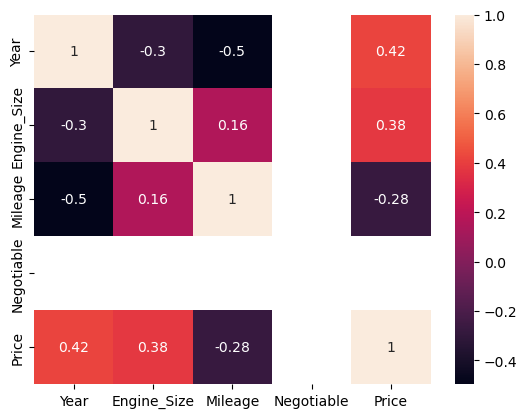

In [7]:
corr_matrix = saudi.corr('spearman')
sns.heatmap(corr_matrix, annot= True)

Year and Engine_size may have a multicolinearity but we still need the features. 

from this correlation heatmap, we can see that:

* `Price` = medium correlation to `year` and `Engine_size`, low correlation to `Mileage` 

## finding the top 10 Companies of used Cars & Top 10 Types of used Cars

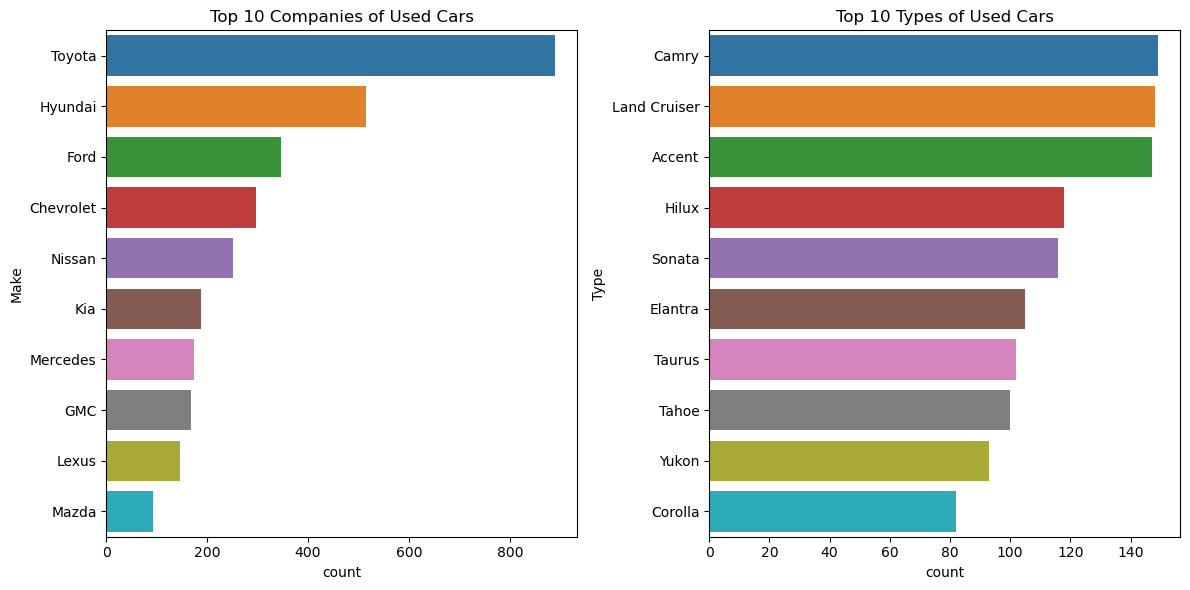

In [8]:
# Create a subplot with two countplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the top 10 companies of used cars
sns.countplot(y="Make", data=saudi, order=saudi["Make"].value_counts().iloc[:10].index, ax=axes[0])
axes[0].set_title("Top 10 Companies of Used Cars")

# Plot the top 10 types of used cars
sns.countplot(y="Type", data=saudi, order=saudi["Type"].value_counts().iloc[:10].index, ax=axes[1])
axes[1].set_title("Top 10 Types of Used Cars")

# Adjust the layout of the subplot and show the plot
fig.tight_layout()
plt.show()

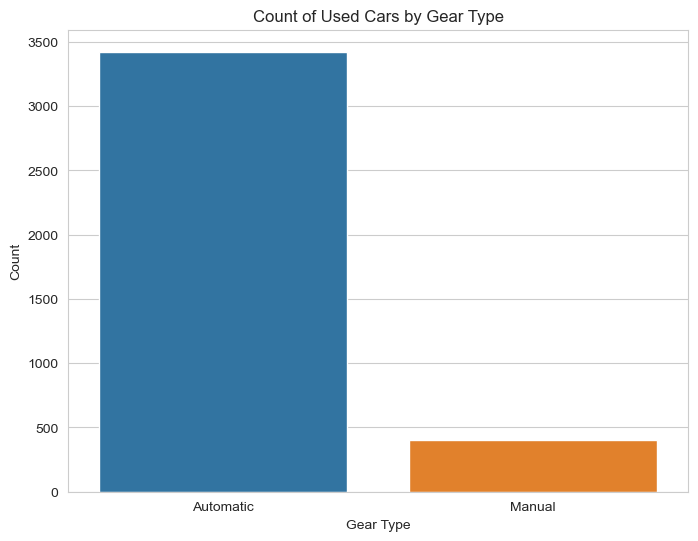

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gear_Type', data=saudi)
ax.set_title('Count of Used Cars by Gear Type')
ax.set_xlabel('Gear Type')
ax.set_ylabel('Count')
plt.show()


from the countplot above, the used car in saudi Arabia is dominated by an autamic gear type

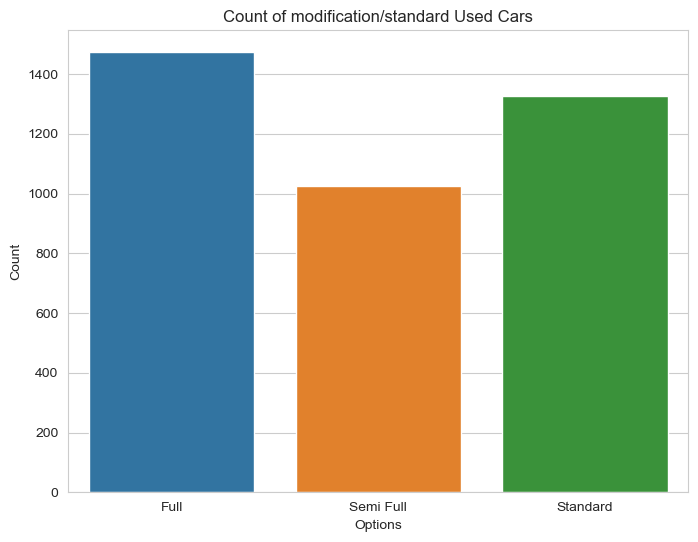

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Options', data=saudi)
ax.set_title('Count of modification/standard Used Cars')
ax.set_xlabel('Options')
ax.set_ylabel('Count')
plt.show()


The option feature tells us about the accesories of the cars such as soundsystem, leather seats,etc.

we can see from the countplot above semifull is the least popular.

# **Data Preprocessing**
At this stage, we will perform data cleaning, where the cleaned data will be used for further analysis. Some things that need to be done include:

Dropping irrelevant features that do not contribute to the problem at hand.

Treating missing values, either by dropping the feature if it is not needed or by imputing with the most reasonable value based on the case.

For data preprocessing and feature engineering, we will use a duplicated dataframe from the previously used dataframe.

## Missing value heatmap

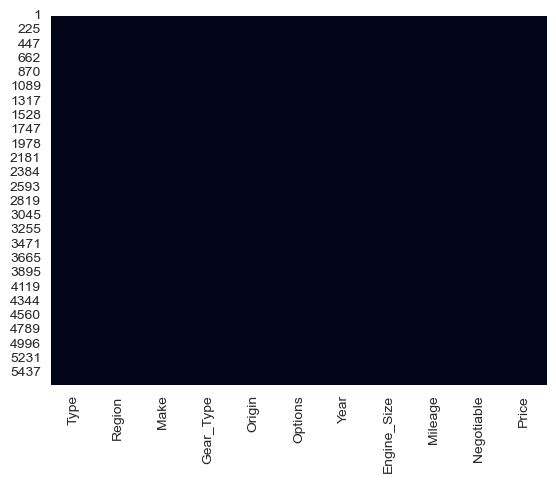

In [11]:
# Missing value heatmap
sns.heatmap(saudi.isnull(), cbar=False);

as we can see, we have no missing values

## duplcated data check

In [12]:
saudi.duplicated().sum()

3

In [13]:
saudi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3827 entries, 1 to 5622
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3827 non-null   object 
 1   Region       3827 non-null   object 
 2   Make         3827 non-null   object 
 3   Gear_Type    3827 non-null   object 
 4   Origin       3827 non-null   object 
 5   Options      3827 non-null   object 
 6   Year         3827 non-null   int64  
 7   Engine_Size  3827 non-null   float64
 8   Mileage      3827 non-null   int64  
 9   Negotiable   3827 non-null   bool   
 10  Price        3827 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 332.6+ KB


## Price Anomaly 

We need to see the minimum price from the real event. 
If we found the right value price from the real dataset was scraped at https://syarah.com/en/cars/used-cars
too bad, we cannot see what is the lowest used cars price. 

using another website such as https://ksa.yallamotor.com/used-cars/under-5000-sar?sort=price_desc
the lowest price is 5000 SAR, so I will delete a price under 5000 SAR

In [14]:
saudi.query(" Price < 5000  ")

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
46,Elantra,Abha,Hyundai,Automatic,Saudi,Semi Full,2020,2.0,27000,False,1010
65,Malibu,Arar,Chevrolet,Automatic,Saudi,Standard,2021,1.5,24000,False,1200
304,Azera,Tabouk,Hyundai,Automatic,Saudi,Standard,2018,3.5,147,False,2049
356,Wingle,Jeddah,Great Wall,Manual,Saudi,Full,2020,2.0,73000,False,1197
396,K5,Aseer,Kia,Automatic,Saudi,Standard,2021,2.5,30000,False,1414
...,...,...,...,...,...,...,...,...,...,...,...
5430,Passat,Hail,Volkswagen,Automatic,Saudi,Semi Full,2018,2.5,59000,False,2402
5521,Suburban,Al-Medina,Chevrolet,Automatic,Other,Semi Full,1997,6.0,292764,False,4000
5523,Tucson,Makkah,Hyundai,Automatic,Saudi,Semi Full,2020,2.0,58000,False,1313
5547,Optima,Qassim,Kia,Automatic,Saudi,Standard,2019,2.0,91000,False,1440


In [15]:
saudi = saudi[saudi['Price'] >= 5000]

In [16]:
saudi = saudi[saudi['Price']> 0]

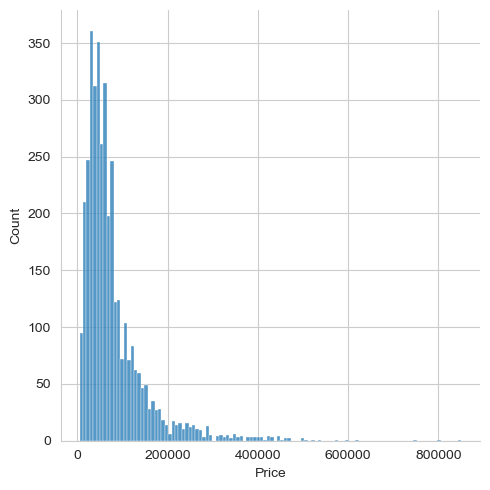

In [17]:
sns.displot(data=saudi, x='Price')

In [18]:
duplikat = saudi.duplicated().sum()
print(f"duplicated value =  {duplikat}")

duplicated value =  3


The dataset has 3 duplicated, i will delete the duplicate value 

In [19]:
saudi.drop_duplicates(inplace=True)

## **Outliers**

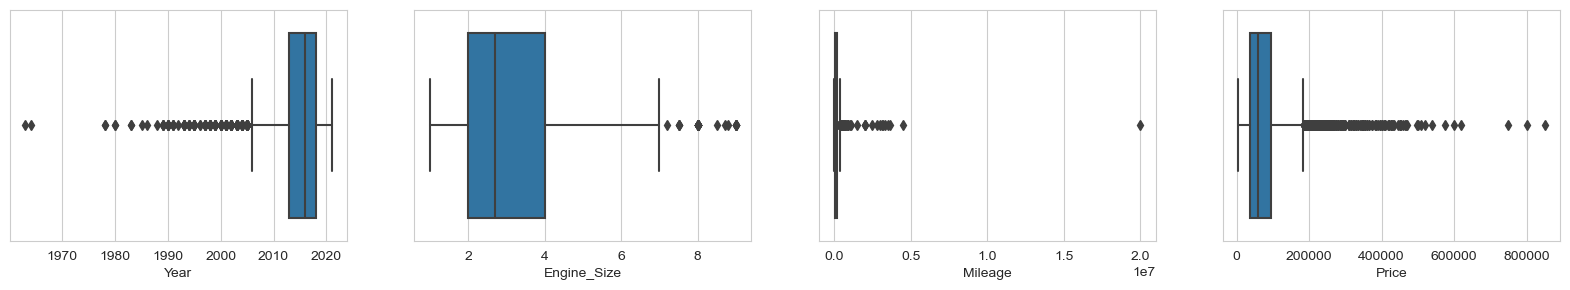

In [20]:
plt.figure(figsize=(20,3))

plotnumber = 1
for kolom in saudi.describe().columns:

    plt.subplot(1,4, plotnumber)
    sns.boxplot(data=saudi, x=kolom)

    plotnumber += 1

from this information, the Mileage column has an outlier. We will treat the outlier by removing it.

In [48]:
saudi=saudi[saudi['Mileage']<20000000]

In [21]:
saudi.query(" Mileage >= 10000000  ")

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
...,...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,False,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000


**The outliers**

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

- in the year column, we can see there are outliers where some cars are manufactured under 1970. Some outliers needs no treatment because it can give us information. one of the outliers is Impala Chevrolet. It is a classic car that can be sold again. I will not treat this outliers because it gives us information.
- I will not treat Engine_size
- in the mileage column, there is an outliers, I will treat the column by droping the outlier's row


In [22]:
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    lower_limit = q1 - limit
    upper_limit = q3 + limit
    print(f'lower limit : {lower_limit}')
    print(f'upper limit: {upper_limit}')    

In [23]:
for col in saudi.describe().columns:
    print(f"Column: {col}")
    find_anomalies(saudi[col])


Column: Year
IQR: 5.0
lower limit : 2005.5
upper limit: 2025.5
Column: Engine_Size
IQR: 2.0
lower limit : -1.0
upper limit: 7.0
Column: Mileage
IQR: 135000.0
lower limit : -153500.0
upper limit: 386500.0
Column: Price
IQR: 59000.0
lower limit : -52500.0
upper limit: 183500.0


## Data Correlation

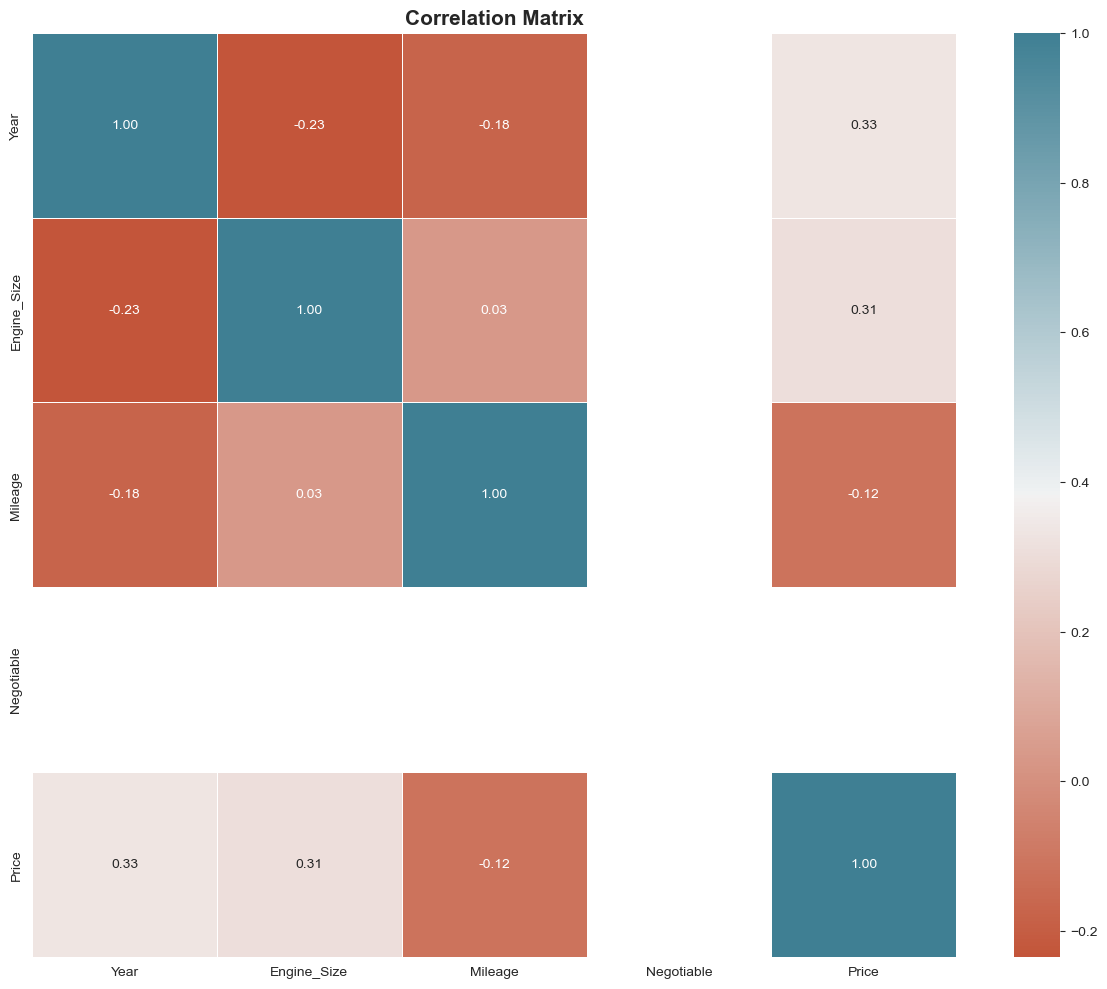

In [24]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = saudi.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

## Droping the column

The Negotiable column is a boolean type of data that we cannot use for further analysis and the model

In [25]:
saudi = saudi.drop(columns='Negotiable')

In [26]:

listItem = []

for col in saudi.columns:
    listItem.append([col, saudi[col].dtype, saudi[col].isna().sum(), round((saudi[col].isna().sum()/len(saudi[col]))*100, 2),
                    saudi[col].nunique(), list(saudi[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.0,318,"[C200, Charger]"
1,Region,object,0,0.0,27,"[Besha, Al-Medina]"
2,Make,object,0,0.0,56,"[Mitsubishi, MG]"
3,Gear_Type,object,0,0.0,2,"[Automatic, Manual]"
4,Origin,object,0,0.0,4,"[Saudi, Other]"
5,Options,object,0,0.0,3,"[Semi Full, Standard]"
6,Year,int64,0,0.0,41,"[2009, 2004]"
7,Engine_Size,float64,0,0.0,65,"[6.3, 4.3]"
8,Mileage,int64,0,0.0,1329,"[289000, 172]"
9,Price,int64,0,0.0,404,"[87500, 57500]"


# **Modeling**

## **Split Train Test**

In [49]:
# define X y
X = saudi.drop(columns='Price')
y = saudi['Price'] 

Splitting data training and test with the proportion of 80:20

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
X,
 y,
 test_size=0.2,
 random_state=0)

## Transformer of Encoding & Scaling

To be able to use all the selected features, categorical features must be converted into numerical features. We can use ColumnTransformer to change the data types, which can then be applied to the pipeline model.

In [51]:
transformer = ColumnTransformer([
    ('scaler', RobustScaler(), ['Year', 'Mileage']),
    ('onehot', OneHotEncoder(drop='first'), ['Origin', 'Gear_Type', 'Options']),
    ('binary', ce.BinaryEncoder(),['Type', 'Region', 'Make'])
], remainder='passthrough')

## **Choosing the best model**

In [30]:
# Import library

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge

from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

Cross-validation is a statistical method used to evaluate machine learning models. It helps to reduce the risk of overfitting and provides an estimate of how well the model is likely to perform on new, unseen data.

In this code, the `cross_val_score` function is used to perform cross-validation for three different evaluation metrics: 
- root mean squared error (RMSE), 
- mean absolute error (MAE), 
- and mean absolute percentage error (MAPE). 

`The Pipeline()` function is used to chain the data preprocessing and model building steps into a single object that can be evaluated using cross-validation.

The models list contains eight different regression models:
1. LinearRegression(),
2. DecisionTreeRegressor(),
3. RandomForestRegressor(),
4. GradientBoostingRegressor(),
5. SVR(),
6. BayesianRidge(),
7. KNeighborsRegressor(),
8. XGBRegressor()

By testing multiple models, we can compare their performance and choose the one that performs the best for our specific task.

Overall, by using cross-validation to evaluate multiple regression models, we can determine which model is the best fit for our data and select it for further use.

In [52]:
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    BayesianRidge(),
    KNeighborsRegressor(),
    XGBRegressor(random_state=1)
]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# finding the best algorithm based on metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-50093.48359896 -52407.15078444 -62516.72139737 -51426.55931634
 -63609.10309481] LinearRegression()
[-31061.73678073 -33729.6851644  -37443.57464619 -33239.85443004
 -39028.57110449] LinearRegression()
[-0.6325565  -0.68510598 -0.75249366 -0.66089313 -0.70551115] LinearRegression()
[-47393.15850226 -51492.68632948 -49258.73614535 -49138.98923525
 -52704.18386463] DecisionTreeRegressor()
[-24116.47420965 -25877.718802   -23781.00998336 -24462.24625624
 -24915.01833333] DecisionTreeRegressor()
[-0.36536662 -0.36323334 -0.42235495 -0.39637535 -0.33632099] DecisionTreeRegressor()
[-34414.74444042 -34448.82813419 -37634.88523918 -34955.24072354
 -38839.97909008] RandomForestRegressor()
[-17343.842335   -17641.05945092 -18233.09951747 -17327.96306077
 -18774.93264444] RandomForestRegressor()
[-0.2849678  -0.29682322 -0.35385021 -0.31160398 -0.27608027] RandomForestRegressor()
[-37431.93205259 -36596.39890326 -38317.99899632 -37028.06712863
 -43441.0950947 ] GradientBoostingRegressor()
[-20

In [53]:
# create a dictionary to store the results
results_dict = {
    'Model': ['Linear Regression', 'Decision Tree', 
              'Random Forest', 'Gradient Boosting', 'SVR', 'Bayesian Ridge', 
              'K-Nearest Neighbors', 'XGBRegressor'],
    'RMSE_mean': nilai_mean_rmse,
    'RMSE_std': nilai_std_rmse,
    'MAE_mean': nilai_mean_mae,
    'MAE_std': nilai_std_mae,
    'MAPE_mean': nilai_mean_mape,
    'MAPE_std': nilai_std_mape
}

# create a dataframe from the dictionary
results_df = pd.DataFrame(results_dict)

# print the dataframe
results_df

,Model,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std
0,Linear Regression,-56010.603638,5815.108024,-34900.684425,2911.111598,-0.687312,0.040696
1,Decision Tree,-49997.550815,1877.611626,-24630.493517,728.103090,-0.376730,0.029704
2,Random Forest,-36058.735525,1829.304401,-17864.179402,561.005287,-0.304665,0.027327
3,Gradient Boosting,-38563.098435,2504.343854,-21477.183596,1156.035593,-0.358453,0.017498
4,SVR,-77288.868942,7619.325925,-44345.892847,3572.759438,-0.720777,0.016919
5,Bayesian Ridge,-55945.802356,5812.047145,-34716.437717,2854.007697,-0.680894,0.041866
6,K-Nearest Neighbors,-40503.459245,4504.901856,-21317.921489,2021.954023,-0.369092,0.034471
7,XGBRegressor,-34251.164254,3287.313139,-17131.458528,1437.062277,-0.278506,0.010263


This dataframe shows the results of cross-validation scores for each tested regression model using three metrics: 
1. RMSE (Root Mean Squared Error), 
2. MAE (Mean Absolute Error),
3. and MAPE (Mean Absolute Percentage Error).

For each model, the dataframe shows the mean and standard deviation of the scores for each metric. Lower scores indicate better performance, so we can compare the models by looking at the mean scores.

Based on the mean RMSE scores, the `XGBRegressor` model performed the best with a score of -34251., followed by the `Random Forest` model with a score of -36058.735525	. The SVR model had the worst RMSE score with a mean of -77288.868942.

For the MAE metric, the XGBRegressor model again had the best performance with a mean score of -17131.458528, followed by the `Random Forest` model with a score of 17864.179402. The SVR model had the worst MAE score with a mean of -44345.892847.

For the MAPE metric, The best performance for MAPE was achieved by the XGBRegressor with a mean score of -0.278506

Overall, the `XGBRegressor` and `Random Forest` models appear to be the best performing models based on the mean scores for all three metrics.

we will use the best model which is `XGBRegressor` to be tuned up

### What is XGBoost?

Gradient boosting is a supervised learning algorithm that can accurately predict a target variable by combining the predictions of a set of simpler and weaker models. When used for regression, the weak learners are regression trees, where each regression tree maps an input data point to one of its leaves, which contains a continuous score.

If Random Forest can be likened to a group of people who discuss and make decisions based on their knowledge, then Gradient Boosting can be likened to a group of people who try to fix the mistakes made by someone who previously made a decision, and they try to find the best solution to the problem.

XGBoost stands for Extreme Gradient Boosting. It is a model that performs well because it can handle different types of data, relationships, distributions, and various hyperparameters that can be tuned. XGBoost can be used for regression, classification, and ranking problems.

XGBoost minimizes a regularized objective function (L1 and L2) that combines a convex loss function (based on the difference between the target output and prediction) and a penalty term for the complexity of the model (i.e., the regression tree function). Its training is iterative, adding a new tree that predicts the residual or error of the previous tree, which is combined with the previous trees to generate the final prediction. It is called gradient boosting because it uses a derivative-based algorithm to minimize the loss when adding a new model.

In general, XGBoost is a powerful and efficient implementation of gradient boosting that is widely used in machine learning for its high accuracy, speed, and flexibility in handling various types of data and tasks.

## **Hyperparameter Tuning**
Next, we will perform hyperparameter tuning on the XGBoost model with the hope of improving its performance.

In [33]:
from jcopml.tuning import grid_search_params as gsp

In [34]:
gsp.xgb_params

{'algo__max_depth': [3, 6, 10],
 'algo__colsample_bytree': [0.4, 0.6, 0.8],
 'algo__n_estimators': [100, 150, 200],
 'algo__subsample': [0.4, 0.6, 0.8],
 'algo__gamma': [1, 5, 10],
 'algo__learning_rate': [0.01, 0.1, 1],
 'algo__reg_alpha': [0.01, 0.1, 10],
 'algo__reg_lambda': [0.01, 0.1, 10]}

The output shows a dictionary of hyperparameters with their corresponding values that will be used in tuning the XGBoost model. Here are the descriptions of each hyperparameter:

- max_depth: maximum depth of a tree. Increasing this value will make the model more complex and prone to overfitting.
- colsample_bytree: subsample ratio of columns when constructing each tree. It specifies the fraction of columns to be randomly sampled for each tree.
- n_estimators: number of trees to fit. Increasing this value will make the model more robust and less prone to overfitting.
- subsample: subsample ratio of the training instances. It specifies the fraction of observations to be randomly sampled for each tree.
- gamma: minimum loss reduction required to make a further partition on a leaf node of the tree. It specifies the regularization parameter for tree growth.
- learning_rate: step size shrinkage used in each boosting iteration. It reduces the influence of each individual tree and makes the model more robust to noise.
- reg_alpha: L1 regularization term on weights. It can be used to reduce the complexity of the model and prevent overfitting.
- reg_lambda: L2 regularization term on weights. It can be used to reduce the complexity of the model and prevent overfitting.

In [35]:
from sklearn.model_selection import GridSearchCV

GridSearch is a technique in machine learning used to find the best combination of hyperparameters for a model. Hyperparameters are parameters that are not automatically set by the machine learning algorithm, and must be set before the training process begins. Properly setting hyperparameters can improve the performance of the model and prevent overfitting.

In GridSearch, we specify a list of hyperparameters we want to test and the combinations of their values. Then, GridSearch will try all these combinations and evaluate the model's performance using cross-validation techniques. GridSearch will provide the best hyperparameter combination that gives the best performance on the selected dataset.

Using GridSearch, we can save time and effort required to manually determine the best hyperparameter combination. Additionally, this technique also helps prevent overfitting and improve the overall performance of the model.

In [36]:
# define the pipeline
estimator = Pipeline([
    ('preprocessing', transformer),
    ('algo', XGBRegressor())
])
# perform hyperparameter tuning using gridsearch
gridsearch = GridSearchCV(
    estimator=estimator,
    param_grid=gsp.xgb_params,
    cv=5,
    scoring='neg_mean_absolute_percentage_error',
    verbose=1,
    n_jobs=-1
)

# fit the model
gridsearch.fit(X_train, y_train)

# print the best hyperparameters
gridsearch.best_params_

Fitting 5 folds for each of 6561 candidates, totalling 32805 fits


{'algo__colsample_bytree': 0.8,
 'algo__gamma': 10,
 'algo__learning_rate': 0.1,
 'algo__max_depth': 10,
 'algo__n_estimators': 150,
 'algo__reg_alpha': 0.01,
 'algo__reg_lambda': 10,
 'algo__subsample': 0.6}




The best `gridsearch.best_params_`

{'algo__colsample_bytree': 0.8,

 'algo__gamma': 10,
 
 'algo__learning_rate': 0.1,
 
 'algo__max_depth': 10,
 
 'algo__n_estimators': 150,
 
 'algo__reg_alpha': 0.01,
 
 'algo__reg_lambda': 10,
 
 'algo__subsample': 0.6}
 
 
 These hyperparameters would be used to train an XGBoost model on a given dataset. The performance of the model could then be evaluated using a suitable evaluation metric to determine how well it is able to make predictions on new, unseen data.


In [37]:
# cv result
pd.DataFrame(gridsearch.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__colsample_bytree,param_algo__gamma,param_algo__learning_rate,param_algo__max_depth,param_algo__n_estimators,param_algo__reg_alpha,...,param_algo__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6271,3.788007,0.142380,0.061126,0.013323,0.8,10,0.1,10,150,0.01,...,0.6,"{'algo__colsample_bytree': 0.8, 'algo__gamma': 10, 'algo__learning_rate': 0.1, 'algo__max_depth': 10, 'algo__n_estimators': 150, 'algo__reg_alpha': 0.01, 'algo__reg_lambda': 10, 'algo__subsample': 0.6}",-2.896445e-01,-2.782456e-01,-2.518897e-01,-2.378118e-01,-2.538333e-01,-2.622850e-01,1.887706e-02,1
6280,4.371735,0.457592,0.078555,0.015580,0.8,10,0.1,10,150,0.1,...,0.6,"{'algo__colsample_bytree': 0.8, 'algo__gamma': 10, 'algo__learning_rate': 0.1, 'algo__max_depth': 10, 'algo__n_estimators': 150, 'algo__reg_alpha': 0.1, 'algo__reg_lambda': 10, 'algo__subsample': 0.6}",-2.896445e-01,-2.782455e-01,-2.518897e-01,-2.378118e-01,-2.538333e-01,-2.622850e-01,1.887706e-02,2
5542,3.392074,0.268344,0.087494,0.028978,0.8,5,0.1,10,150,0.01,...,0.6,"{'algo__colsample_bytree': 0.8, 'algo__gamma': 5, 'algo__learning_rate': 0.1, 'algo__max_depth': 10, 'algo__n_estimators': 150, 'algo__reg_alpha': 0.01, 'algo__reg_lambda': 10, 'algo__subsample': 0.6}",-2.896445e-01,-2.782456e-01,-2.518897e-01,-2.378118e-01,-2.538333e-01,-2.622850e-01,1.887707e-02,3
4813,2.931161,0.061434,0.053121,0.007654,0.8,1,0.1,10,150,0.01,...,0.6,"{'algo__colsample_bytree': 0.8, 'algo__gamma': 1, 'algo__learning_rate': 0.1, 'algo__max_depth': 10, 'algo__n_estimators': 150, 'algo__reg_alpha': 0.01, 'algo__reg_lambda': 10, 'algo__subsample': 0.6}",-2.896445e-01,-2.782456e-01,-2.518897e-01,-2.378118e-01,-2.538333e-01,-2.622850e-01,1.887707e-02,3
5551,3.642776,0.137854,0.065620,0.011691,0.8,5,0.1,10,150,0.1,...,0.6,"{'algo__colsample_bytree': 0.8, 'algo__gamma': 5, 'algo__learning_rate': 0.1, 'algo__max_depth': 10, 'algo__n_estimators': 150, 'algo__reg_alpha': 0.1, 'algo__reg_lambda': 10, 'algo__subsample': 0.6}",-2.896446e-01,-2.782455e-01,-2.518897e-01,-2.378118e-01,-2.538333e-01,-2.622850e-01,1.887707e-02,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2889,3.492399,0.082372,0.076157,0.011747,0.6,1,1,10,200,0.01,...,0.4,"{'algo__colsample_bytree': 0.6, 'algo__gamma': 1, 'algo__learning_rate': 1, 'algo__max_depth': 10, 'algo__n_estimators': 200, 'algo__reg_alpha': 0.01, 'algo__reg_lambda': 0.01, 'algo__subsample': 0.4}",-1.644769e+07,-3.306975e+06,-1.634558e+06,-1.787126e+06,-3.498030e+06,-5.334875e+06,5.608206e+06,6557
3618,3.071440,0.125844,0.051970,0.003222,0.6,5,1,10,200,0.01,...,0.4,"{'algo__colsample_bytree': 0.6, 'algo__gamma': 5, 'algo__learning_rate': 1, 'algo__max_depth': 10, 'algo__n_estimators': 200, 'algo__reg_alpha': 0.01, 'algo__reg_lambda': 0.01, 'algo__subsample': 0.4}",-1.644769e+07,-3.306975e+06,-1.634558e+06,-1.787126e+06,-3.498030e+06,-5.334875e+06,5.608206e+06,6558
2898,3.681491,0.082450,0.064364,0.006825,0.6,1,1,10,200,0.1,...,0.4,"{'algo__colsample_bytree': 0.6, 'algo__gamma': 1, 'algo__learning_rate': 1, 'algo__max_depth': 10, 'algo__n_estimators': 200, 'algo__reg_alpha': 0.1, 'algo__reg_lambda': 0.01, 'algo__subsample': 0.4}",-1.644765e+07,-3.306965e+06,-1.634554e+06,-1.787121e+06,-3.644064e+06,-5.364070e+06,5.598921e+06,6559
3627,2.776609,0.080838,0.049172,0.003486,0.6,5,1,10,200,0.1,...,0.4,"{'algo__colsample_bytree': 0.6, 'algo__gamma': 5, 'algo__learning_rate': 1, 'algo__max_depth': 10, 'algo__n_estimators': 200, 'algo__reg_alpha': 0.1, 'algo__reg_lambda': 0.01, 'algo__subsample': 0.4}",-1.644765e+07,-3.306965e+06,-1.634554e+06,-1.787121e+06,-3.644064e+06,-5.364070e+06,5.598921e+06,6560


# Predict to Test Set with the Benchmark model

In [54]:
model = XGBRegressor(random_state=2009)

# pipeline
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model)
])

# fit
pipe_model.fit(X_train, y_train)

# predict before tuning
y_pred_before = pipe_model.predict(X_test)

# MAPE Before Tuning
MAPE_before = mean_absolute_percentage_error(y_test, y_pred_before)
MAPE_before

0.2752671261165064

## **Tuning with the best Parameter**

In [39]:
gridsearch.best_params_

{'algo__colsample_bytree': 0.8,
 'algo__gamma': 10,
 'algo__learning_rate': 0.1,
 'algo__max_depth': 10,
 'algo__n_estimators': 150,
 'algo__reg_alpha': 0.01,
 'algo__reg_lambda': 10,
 'algo__subsample': 0.6}

In [62]:
# create a new instance of XGBRegressor with the best hyperparameters
xgb = XGBRegressor(subsample=0.6, 
                   n_estimators=150,
                   max_depth=10,
                   learning_rate=0.1,
                   gamma=10,
                   colsample_bytree=0.8,
                   reg_alpha=0.01,
                   reg_lambda=10)

# update the Pipeline to include the XGBRegressor model
pipe_model_tuning = Pipeline([
        ('preprocessing', transformer),
        ('xgb', xgb)
    ])

# fit the model with the updated Pipeline
pipe_model_tuning.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', RobustScaler(),
                                                  ['Year', 'Mileage']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Origin', 'Gear_Type',
                                                   'Options']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Type', 'Region',
                                                   'Make'])])),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, co...
                              feature_types=None, gamma=10, gpu_id=None,
                              grow_po

### **Result After tuning**


In [63]:
# define best model (after tuning)
best_model = gridsearch.best_estimator_

# fit
best_model.fit(X_train, y_train)

# predict
y_pred_after = best_model.predict(X_test)

mean_absolute_percentage_error(y_test, y_pred_after) * 100

23.63680342966437

In [66]:
# define best model (after tuning)
best_model = pipe_model_tuning

# fit
best_model.fit(X_train, y_train)

# predict
y_pred_after = best_model.predict(X_test)

mean_absolute_percentage_error(y_test, y_pred_after) * 100

23.63680342966437

In [67]:
# algo
model = XGBRegressor(random_state=1)

# pipeline
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model)
])

# fit
pipe_model.fit(X_train, y_train)

# predict
y_pred_before = pipe_model.predict(X_test)

MAPE_before = mean_absolute_percentage_error(y_test, y_pred_before)
MAPE_before

0.2752671261165064

# The Comparassion of both performances before and after hyperparameter tuning.

In [64]:
# compare
print(mean_absolute_percentage_error(y_test, y_pred_before) * 100,"%",'MAPE before tuning')
print(mean_absolute_percentage_error(y_test, y_pred_after_best_tuning) * 100,'%' " " 'MAPE after tuning')

27.526712611650638 % MAPE before tuning
23.63680342966437 % MAPE after tuning


This comparison is between the Mean Absolute Percentage Error (MAPE) of a regression model before and after tuning the hyperparameters of the model. The MAPE is a common evaluation metric used to measure the accuracy of regression models, which represents the percentage difference between the predicted and actual values of the target variable.

The results show that after tuning the hyperparameters of the model, the MAPE decreased from 27.52% to 23.63%, indicating that the model's accuracy has improved 3.889%. This suggests that the hyperparameter tuning process was successful in improving the model's performance, and the updated model can make better predictions on new data.

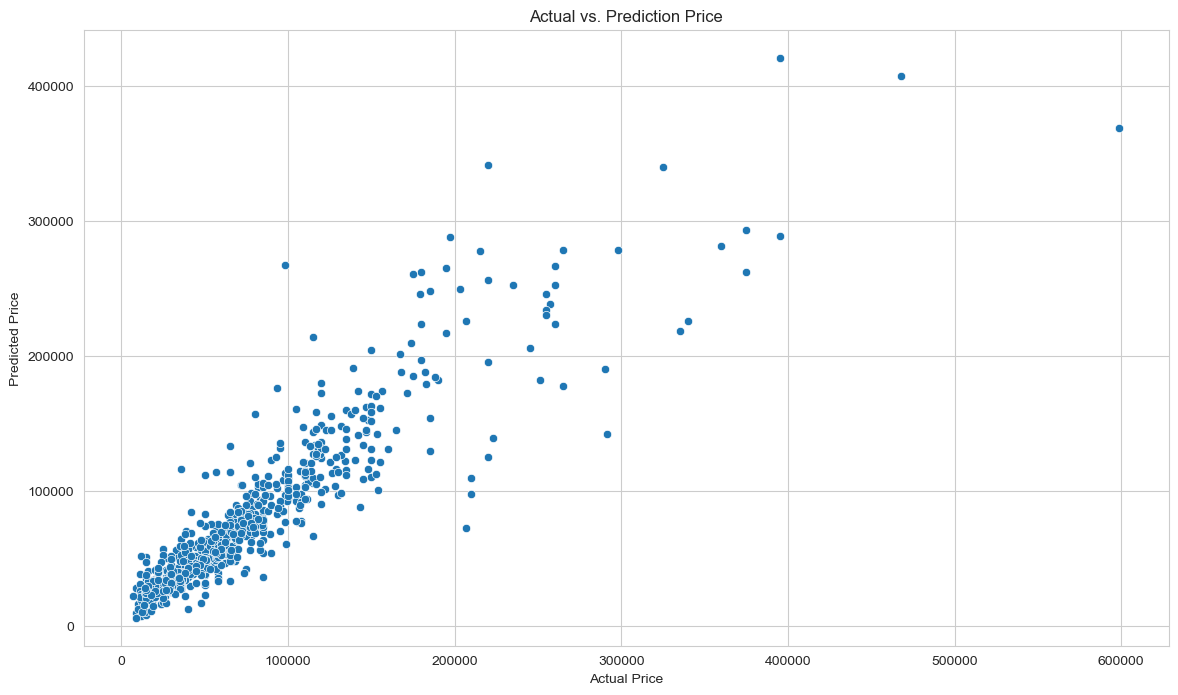

In [59]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_after_best_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

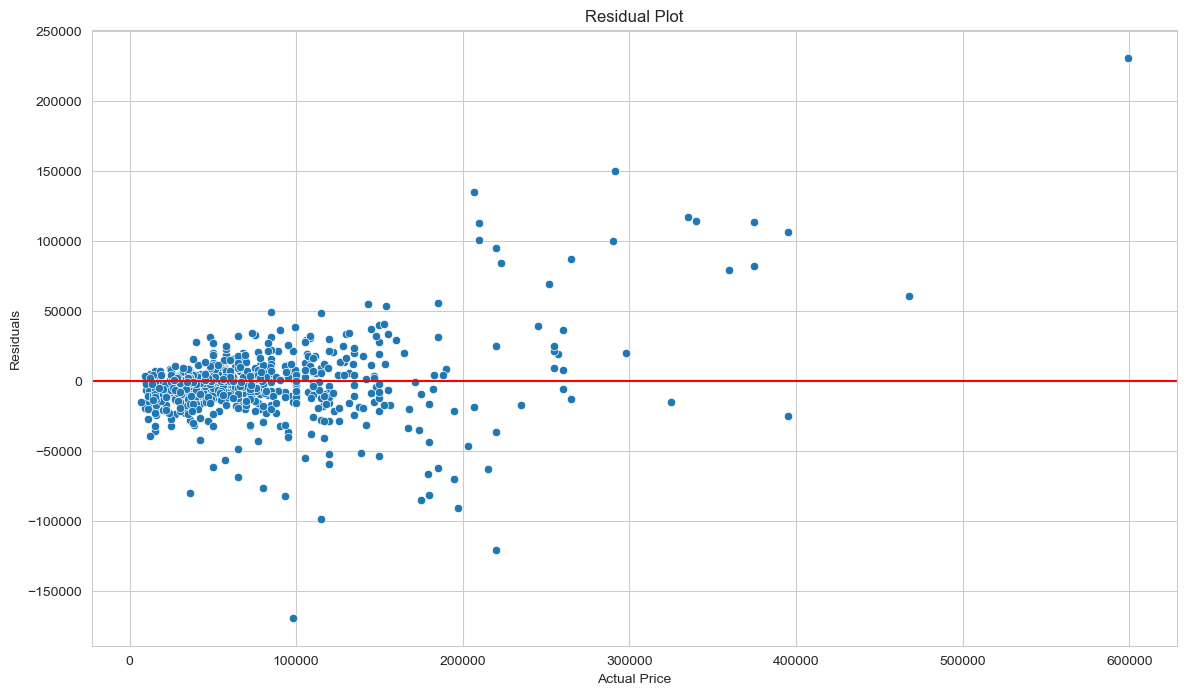

In [60]:
plt.figure(figsize=(14, 8))
residuals = y_test - y_pred_after_best_tuning
plot = sns.scatterplot(x=y_test, y=residuals).set(title='Residual Plot', 
                                                 xlabel='Actual Price', 
                                                 ylabel='Residuals')
plt.axhline(y=0, color='red')

Based on the residual plot. The model is good enough to predict the car price from 5000 SAR to  200,000 SAR

# Conclusion and Recommendations 
## Conclusion 

- The best model to be implemented to this dataset is XGBoost Regressor with the hyperparameter tuning subsample=0.6, 
                   n_estimators=150,
                   max_depth=10,
                   learning_rate=0.1,
                   gamma=10,
                   colsample_bytree=0.8,
                   reg_alpha=0.01,
                   reg_lambda=10
- According to feature correlation to Price. The most correlated feature is **Year**
- A dataset with a column of prices containing zero values cannot be used for machine learning because we only want to predict data with real numbers. However, this has the effect of making the dataset very small (only 3818 rows of data).
- This comparison is between the Mean Absolute Percentage Error (MAPE) of a regression model before and after tuning the hyperparameters of the model. The MAPE is a common evaluation metric used to measure the accuracy of regression models, which represents the percentage difference between the predicted and actual values of the target variable.

 - The results show that after tuning the hyperparameters of the model, the MAPE decreased from 27.52% to 23.63%, indicating that the model's accuracy has improved 3.889%. This suggests that the hyperparameter tuning process was successful in improving the model's performance, and the updated model can make better predictions on new data.

## Recommendation 
Things that can be done to further develop the model to make it better are:

- Adding more data rows because the available data after removing rows with zero values is only 3818 rows. This addition is recommended to avoid overfitting and memorizing data in the evaluation matrix.

- Adding more columns of data (independent variables) related to the target column (dependent variable) because the number of available data columns is limited.


# Save Model
 

In [68]:

import pickle

best_model = pipe_model_tuning
best_model.fit(X_train, y_train)

pickle.dump(best_model, open('Saudi_Arabia_Used_Cars_Model_xgb.sav', 'wb'))

In [70]:

filename = 'Saudi_Arabia_Used_Cars_Model_xgb.sav'
loaded_model = pickle.load(open(filename, 'rb'))

Hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi adalah:

Menambahkan lebih banyak baris data karena data yang tersedia setelah menghapus baris dengan nilai nol hanya memiliki 3818 baris data. Penambahan ini disarankan untuk menghindari overfitting dan menghafal data pada evaluation matrix.

Menambahkan lebih banyak kolom data (variabel independen) yang terkait dengan kolom target (variabel dependen) karena jumlah kolom data yang tersedia terbatas.



